<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name: Mohamed Aboelazaiem Salama

Member 1 ID: 40-6227

Member 1 Tutorial: T-08

Member 2 Name: Ahmed Youssef

Member 2 ID: 40-11602

Member 2 Tutorial: T-02

## Imports (Don't Edit)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image  
import PIL
%matplotlib inline

## Read Data (Don't Edit)

In [2]:
df_iris = pd.read_csv("iris.csv") #iris data
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
flower_types = df_iris.variety.unique()
print(flower_types)
len(flower_types)

['Setosa' 'Versicolor' 'Virginica']


3

In [4]:
features = df_iris.columns[:4]
class_labels = list(df_iris[df_iris.columns[-1]])
df = df_iris[features]
df

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Initializing a clustering membership for every row in the dataframe

In [5]:
data_points = df.to_numpy()
data_points

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
K = 3 # Since we have 3 types 
q = 1.5 # Since 1 would make it a K-means clustering
Rnk = np.random.dirichlet(np.ones(K),size=150)
Rnk

array([[0.56422331, 0.28056465, 0.15521205],
       [0.13927463, 0.70082467, 0.1599007 ],
       [0.0652058 , 0.8865043 , 0.0482899 ],
       [0.05303747, 0.04312038, 0.90384215],
       [0.01041759, 0.93914142, 0.050441  ],
       [0.20093665, 0.70391578, 0.09514757],
       [0.01362688, 0.53383751, 0.45253562],
       [0.77375263, 0.03515808, 0.19108929],
       [0.13703847, 0.76253739, 0.10042414],
       [0.82165188, 0.05272083, 0.12562728],
       [0.31864968, 0.06648585, 0.61486447],
       [0.51860469, 0.32134112, 0.16005419],
       [0.2420509 , 0.68201822, 0.07593088],
       [0.36820908, 0.39941411, 0.23237682],
       [0.07772821, 0.3134564 , 0.60881539],
       [0.79927696, 0.14235287, 0.05837018],
       [0.62129997, 0.25482206, 0.12387797],
       [0.60653146, 0.08413737, 0.30933117],
       [0.21581053, 0.25191989, 0.53226958],
       [0.37480615, 0.29326031, 0.33193354],
       [0.27411642, 0.52568129, 0.20020229],
       [0.15678764, 0.06489849, 0.77831387],
       [0.

# Cluster Data

In [7]:
def clusterCenterCalculation(Rnk):
    Rnk_value = list(zip(*Rnk)) # Flatten the arrays of membership to one big li (t1,t2,t3) where t1 t2 t3 each reperesent the Rnk value of each row in the dataframe
    cluster_centers = []
    for j in range(K):
        Rnk_value_list = list(Rnk_value[j]) # Taking each array of memberships
        rnk_q = [cur_rnk ** q for cur_rnk in Rnk_value_list]
        den = sum(rnk_q)
        curr_num = []
        for i in range(len(df)):
            data_point = list(df.iloc[i])
            prod = [rnk_q[i] * val for val in data_point]
            curr_num.append(prod)
        num_list = list(zip(*curr_num))
        num = map(sum, num_list) # Summing all product values 
        center = [curr_num/den for curr_num in num]
        cluster_centers.append(center)
    return np.array(cluster_centers)

In [8]:
import operator
import math
def updateRnk(Rnk, Uk):
    data = []
    new_q = float(1/(q-1))
    for i in range(len(df)):
        current_datapoint = list(df.iloc[i])
        data.append(current_datapoint)
        distances = [np.linalg.norm(np.array(list(map(operator.sub, current_datapoint, Uk[j])))) for j in range(K)]
        distances = np.array(distances)
        checkNaN = np.argwhere(np.isnan(distances))
        if(len(checkNaN)!= 0):
            index = checkNaN[0][0]
            distances[index] = 1
        for j in range(K):
            den = sum([math.pow(float(np.square(distances[j])/np.square(distances[m])), new_q) for m in range(K)])
            if(math.isnan(den)):
#                 print('nan detected',den)
                den = 1
            if(den == 0):
#                 print('zero detected causing inf',den)
                den = 0.000000000000000000001
            if(math.isinf(den)):
#                 print('Inf Detected',den)
                den = 999999999999999
            Rnk[i][j] = float(1/den) 
#             print(Rnk[i][j],float(1/den),'Seeeeeee')
    return Rnk , data

In [9]:
def getClusters(Rnk):
    labels = []
    for i in range(len(df)):
        max_val, index = max((val, index) for (index, val) in enumerate(Rnk[i]))
        labels.append(index)
    return labels

In [10]:
def checkConvergence(Rnk_old,Rnk):
    for i in range(150):
        curr_rnk_old = Rnk_old[i]
        curr_rnk = Rnk[i]
        for j in range(3):
            if np.round(curr_rnk_old[j],10) != np.round(curr_rnk[j],10):
                print(abs(curr_rnk_old[j]-curr_rnk[j]))
                return False
            print(abs(curr_rnk_old[j]-curr_rnk[j]))
            
    return True

In [11]:
def fuzzyCMeans(): 
    rtol = 1e-03
    atol = 1e-09
    Rnk = np.random.dirichlet(np.ones(K),size=150) 
    # Initializing Random Centers From Dataset
    random_indicies= np.random.choice(150, size=K, replace=False)
    cluster_centers = np.array(data_points[random_indicies, :])
    Uk = cluster_centers
    Rnk_old = np.array(Rnk)
    for i in range(1000):
        Rnk , data= updateRnk(np.array(Rnk_old), Uk)
        check_convergence = np.allclose(Rnk_old,Rnk,rtol, atol)
#         check_convergence = checkConvergence(Rnk_old,Rnk)
        if check_convergence:
            Uk = clusterCenterCalculation(Rnk)
            labels = getClusters(Rnk)
            print('Converged at',i)
            break
        Rnk_old = np.array(Rnk)
        Uk = clusterCenterCalculation(Rnk)
        labels = getClusters(Rnk)
    return labels, Uk,data

In [12]:
labels, centers ,data = fuzzyCMeans()
label = np.array(labels)

/home/mado/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/home/mado/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Converged at 17


In [13]:
data = np.array(data)
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
label

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
centers

array([[5.23793363, 3.62264377, 1.56772348, 0.30590209],
       [6.33277493, 2.9031368 , 5.00570266, 1.71939489],
       [4.75206777, 3.05326172, 1.59364087, 0.27765027]])

/home/mado/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/home/mado/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Converged at 16
q =  1.5


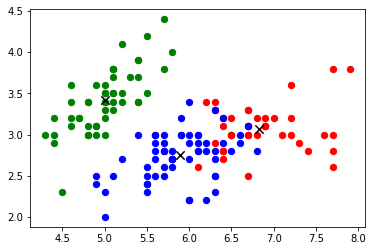

Converged at 19
q =  2.0


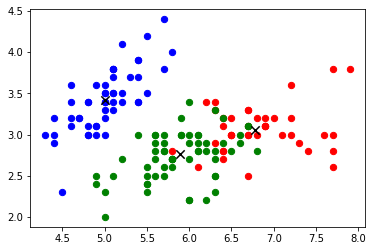

Converged at 19
q =  2.5


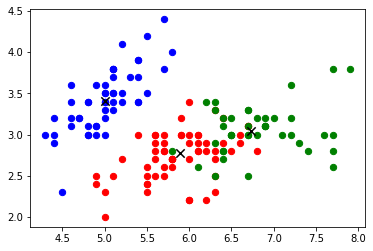

Converged at 23
q =  3.0


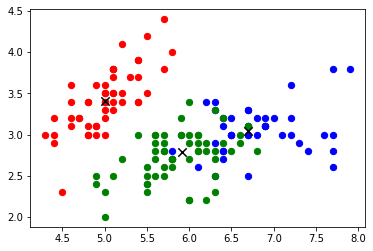

Converged at 24
q =  3.5


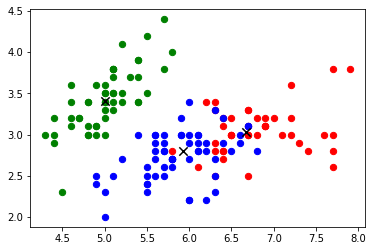

Converged at 21
q =  4.0


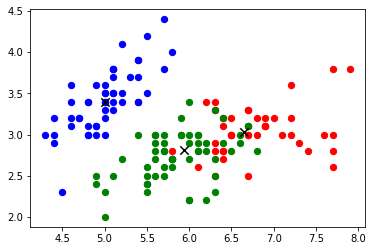

Converged at 16
q =  4.5


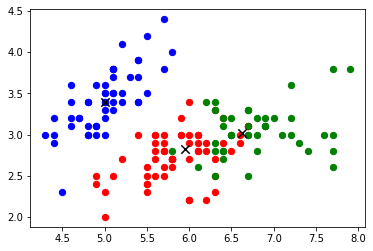

Converged at 22
q =  5.0


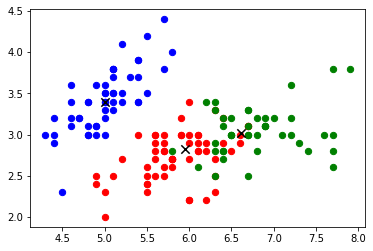

In [16]:
q = 1.5
all_labels = []
all_data = []
q_table = []
while q <= 5:
    labels, centers ,data = fuzzyCMeans()
    label = np.array(labels)
    all_labels.append(label)
    q_table.append(q)
    center = np.array(centers)
    datas = np.array(data)
    plt.scatter(datas[(label == 0), 0], datas[(label == 0), 1], color='r', s=40)
    plt.scatter(datas[(label == 1), 0], datas[(label == 1), 1],  color='b', s=40)
    plt.scatter(datas[(label == 2), 0], datas[(label == 2), 1],  color='g', s=40)
    plt.scatter(center[:, 0], center[:, 1], marker='x', color='k', s=70)
    print('q = ',q)
    plt.show()
    q = q + 0.5

In [17]:
print(np.array(all_labels).shape)
all_labels = np.array(all_labels)
# q_table
# all_labels[6]
# datas[(label == 0),].shape
# df_iris.replace({'variety': mapping})
df_iris['variety']=df_iris['variety'].replace(to_replace='Setosa',value=0)
df_iris['variety']=df_iris['variety'].replace(to_replace='Versicolor',value=1)
df_iris['variety']=df_iris['variety'].replace(to_replace='Virginica',value=2)
type_arr = df_iris['variety'].to_numpy()
type_arr
# all_data = np.array(all_data)
# all_data[1][(label == 2),]

(8, 150)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
for i in range(8):
    output = "Output " + str(q_table[i])
    df_iris[output] = all_labels[i]
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety,Output 1.5,Output 2.0,Output 2.5,Output 3.0,Output 3.5,Output 4.0,Output 4.5,Output 5.0
0,5.1,3.5,1.4,0.2,0,2,1,1,0,2,1,1,1
1,4.9,3.0,1.4,0.2,0,2,1,1,0,2,1,1,1
2,4.7,3.2,1.3,0.2,0,2,1,1,0,2,1,1,1
3,4.6,3.1,1.5,0.2,0,2,1,1,0,2,1,1,1
4,5.0,3.6,1.4,0.2,0,2,1,1,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,2,1,0,0,2,2
146,6.3,2.5,5.0,1.9,2,1,2,2,1,0,0,2,2
147,6.5,3.0,5.2,2.0,2,0,0,2,1,0,0,2,2
148,6.2,3.4,5.4,2.3,2,0,0,2,1,0,0,2,2


In [19]:
outcomes = df_iris.to_numpy()
outcomes = outcomes.T
outcomes

array([[5.1, 4.9, 4.7, ..., 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, ..., 3. , 3.4, 3. ],
       [1.4, 1.4, 1.3, ..., 5.2, 5.4, 5.1],
       ...,
       [1. , 1. , 1. , ..., 0. , 0. , 2. ],
       [1. , 1. , 1. , ..., 2. , 2. , 0. ],
       [1. , 1. , 1. , ..., 2. , 2. , 0. ]])

In [20]:
# array4 = np.zeros((8,3),dtype=int)
# for j in range(5,13):
#     variety = np.array(outcomes[j],dtype=int)
#     array1 = np.zeros((3,3),dtype=int)
#     for i in range(150):
#         if i < 50:
#             array1[0][variety[i]] = array1[0][variety[i]] + 1
#         elif i < 100:
#             array1[1][variety[i]] = array1[1][variety[i]] + 1
#         else:
#             array1[2][variety[i]] = array1[2][variety[i]] + 1
#     array4[j-5][0] = np.argmax(array1[0])
#     array4[j-5][1] = np.argmax(array1[1])
#     array4[j-5][2] = np.argmax(array1[2])
#     if(j==6):
#         print(array1) 
# outcome = array4.T
# outcome

In [21]:
# array4 = np.zeros((8,3),dtype=int)
# array5 = np.zeros((8,3),dtype=int)
# for j in range(5,13):
#     variety = np.array(outcomes[j],dtype=int)
#     array1 = np.zeros((3),dtype=int)
#     for i in range(150):
#         if i < 50:
#             array1[variety[i]] = array1[variety[i]] + 1
#         elif i < 100:
#             array1[variety[i]] = array1[variety[i]] + 1
#         else:
#             array1[variety[i]] = array1[variety[i]] + 1
#     getTypes = array1.argsort()[-3:][::-1]
#     print(getTypes)
#     for m in range(3):
#         array4[j-5][m] = getTypes[m]
#         array5[j-5][getTypes[m]] = array1[getTypes[m]]
    
# print(array5)
# outcome = array4
# outcome

In [22]:
confusion_matrix = [[0] * 3 for i in range(8)]
for i in range(all_labels.shape[0]):
    variety = np.array(outcomes[i+5],dtype=int)
    for j in range(150):
        confusion_matrix[i][variety[j]] = confusion_matrix[i][variety[j]] + 1
confusion_matrix = np.array(confusion_matrix)
confusion_matrix

array([[39, 61, 50],
       [40, 50, 60],
       [59, 50, 41],
       [50, 41, 59],
       [42, 58, 50],
       [42, 50, 58],
       [57, 50, 43],
       [57, 50, 43]])

In [23]:
# confusion_matrix = [[0] * 3 for i in range(8)]
# for i in range(all_labels.shape[0]):
#     for j in range(K):
#         confusion_matrix[i][j] = np.count_nonzero(all_labels[i] == j)
# confusion_matrix = np.array(confusion_matrix)
# confusion_matrix

# Plot Figure

# Confusion Matrix Where Columns Represent ('Setosa' 'Versicolor' 'Virginica') Respectively (0,1,2) and Rows Represent Values of q (1.5,2,2.5,3,3.5,4,4.5,5) respectively

/home/mado/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/home/mado/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


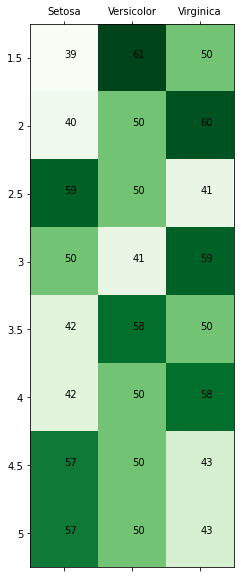

In [25]:
# Plot Confusion Matrix
fig = plt.figure()
alpha = [1,'Setosa' ,'Versicolor' ,'Virginica']
alpha2 = [1,1.5,2,2.5,3,3.5,4,4.5,5]

plt.rc('figure', figsize=[20,10])
ax = fig.add_subplot(111)

ax.matshow(confusion_matrix,cmap='Greens')
for i in range(0,8):
    for j in range(0,3):
        plt.annotate(confusion_matrix[i,j],(j,i))
ax.set_xticklabels(alpha)
ax.set_yticklabels(alpha2)
plt.savefig("Counts.jpg")
plt.show()
